## First Network simulation

> This module creates a first network of biological neurons and simulates their activity. We will then try percolation on this network to understand the effect on neurosegenrative diseases.

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing

import nngt
nngt.set_config('with_nest', True)
import nest
import nngt.simulation as ns
from pathlib import Path

from modules import simulation as nsim
from modules import percolation as per
from modules import analysis

from importlib import reload
reload(nsim)
#reload(per)
reload(analysis)

<module 'modules.analysis' from '/home/ele/Moshir/modules/analysis.py'>

In [2]:
import sys
sys.path.insert(0,'/home/ele/.local/nest-simulator-2.16.0-build/lib/python3.6/site-packages')

In [3]:
num_omp = multiprocessing.cpu_count() #Number of cores on the system

# network Parameters
w = 0.
ds = 0.01
do = 25.
deg = 50.
N = 500
l = 50.
R = 1000

from fromMallory.Neurons_Parameters import di_RS

params = di_RS
params['nb_neurons'] = N
print(params)

{'w': 37.0, 'V_m': -51.0, 'E_L': -70.0, 'I_e': 262.0, 'g_L': 12.01, 'C_m': 200.0, 'a': 2.0, 'V_th': -50.0, 'V_reset': -48.0, 'Delta_T': 1.8, 'b': 70.0, 'tau_w': 300.0, 'V_peak': 30.0, 'tau_syn_ex': 0.2, 't_ref': 2.0, 'nb_neurons': 500}


Making Network


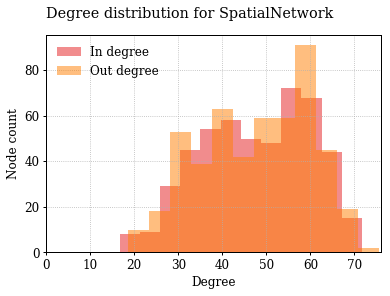

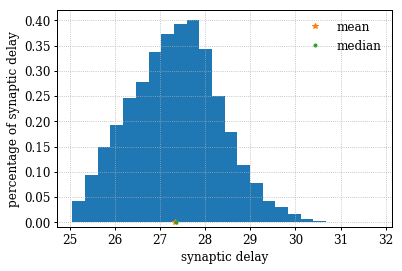

In [5]:
# Make the network
net = nsim.Make_Network("data/first_network.el", num_omp = num_omp, culture_radius = R, num_neurons = N, \
                        avg_deg = deg, lambda_edr = l, delay_slope = ds, delay_offset = do, syn_weight = w,\
                        neuron_params = {'neuron' : params}, plot_degrees=True, plot_delays=True)

In [7]:
# Simulate
senders , spikes, vms, vms_time, w = nsim.Simulation("data/first_network.el", num_omp= num_omp, \
                                    sim_time = 15000, noise_rate = 100., noise_weight_fraction = 0.5,\
                                   noise = 'Minis', save_spk = "data/spk", show_activity = False, return_activity = True,\
                                   animation = False, anim_name = "data/anim.mp4",from_file=True,Vm_IC=('gaussian',-50.,30.),w_IC=('gaussian',params['w'],params['b']))

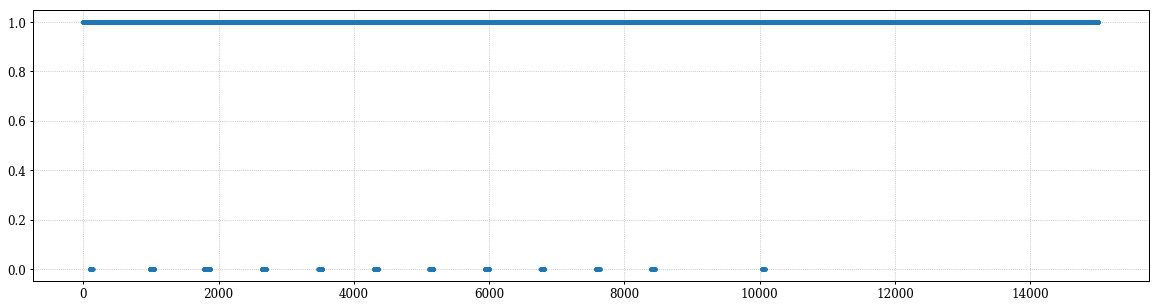

In [29]:
plt.figure(figsize=(20,5))
plt.plot(vms_time,vms>-60,'.')

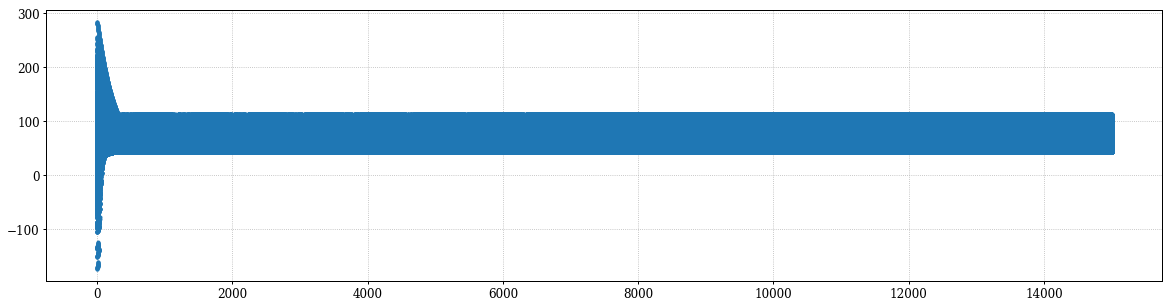

In [9]:
plt.figure(figsize=(20,5))
plt.plot(vms_time,w,'.')

In [10]:
V = np.zeros(N)
W = np.zeros(N)
for i in range(N):
    V[i] = vms[::N][-1]
    W[i] = w[::N][-1]

In [16]:
V

array([-48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44626413,
       -48.44626413, -48.44626413, -48.44626413, -48.44

In [25]:
num_omp = multiprocessing.cpu_count() #Number of cores on the system

# network Parameters
w = 50.
ds = 0.01
do = 25.
deg = 50.
N = 500
l = 50.
R = 1000

from fromMallory.Neurons_Parameters import di_RS

params = di_RS
params['nb_neurons'] = N
print(params)

{'w': 37.0, 'V_m': -51.0, 'E_L': -70.0, 'I_e': 262.0, 'g_L': 12.01, 'C_m': 200.0, 'a': 2.0, 'V_th': -50.0, 'V_reset': -48.0, 'Delta_T': 1.8, 'b': 70.0, 'tau_w': 300.0, 'V_peak': 30.0, 'tau_syn_ex': 0.2, 't_ref': 2.0, 'nb_neurons': 500}


Making Network


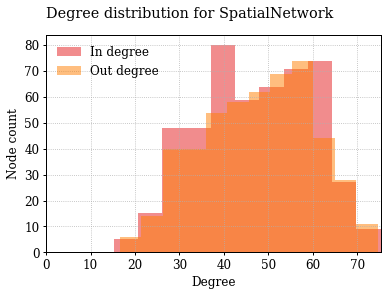

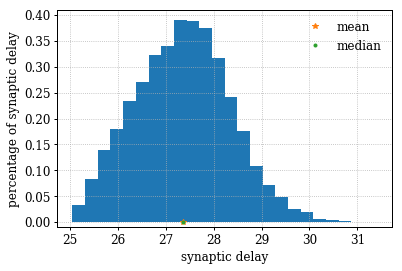

In [26]:
# Make the network
net = nsim.Make_Network("data/first_network.el", num_omp = num_omp, culture_radius = R, num_neurons = N, \
                        avg_deg = deg, lambda_edr = l, delay_slope = ds, delay_offset = do, syn_weight = w,\
                        neuron_params = {'neuron' : params}, plot_degrees=True, plot_delays=True)

In [27]:
# Simulate
senders , spikes, vms, vms_time, w = nsim.Simulation("data/first_network.el", num_omp= num_omp, \
                                    sim_time = 15000, noise_rate = 100., noise_weight_fraction = 0.5,\
                                   noise = 'Minis', save_spk = "data/spk", show_activity = False, return_activity = True,\
                                   animation = False, anim_name = "data/anim.mp4",from_file=True,Vm_IC=V,w_IC=W)

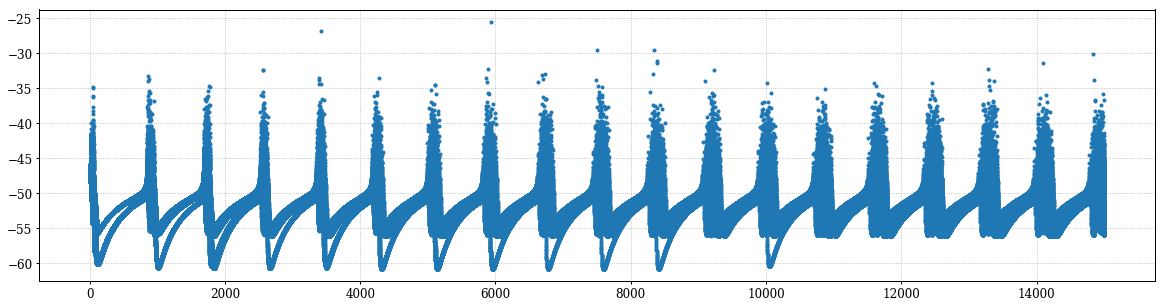

In [28]:
plt.figure(figsize=(20,5))
plt.plot(vms_time,vms,'.')

In [115]:
spikes,senders = analysis.removeTransients_spikes(spikes, senders, cut_time_begin=10000.,\
                                                         cut_time_end=False, cut_begin=True, cut_end=False)
        
vms_time, vms  = analysis.removeTransients_vms(vms_time, vms, w_adap=False, cut_time_begin=10000.\
                                     , cut_time_end=False, cut_begin=True, cut_end=False, wcut=False)

burst_times,burst_neurons = analysis.getBursts_threshold(net, spikes, senders, vms_time, vms, max_delay = 40.,\
                                                   threshold = 0.1, plot_overlay=True, plot_bursts=True,\
                                                   plot_rasters=True, plot_overlay_raster=True)

No Bursts Found


In [30]:
time_phase, phase = analysis.phaseNeurons_firing(senders, spikes, num_neurons=N, sim_time = 15000. , interval = 0.05)

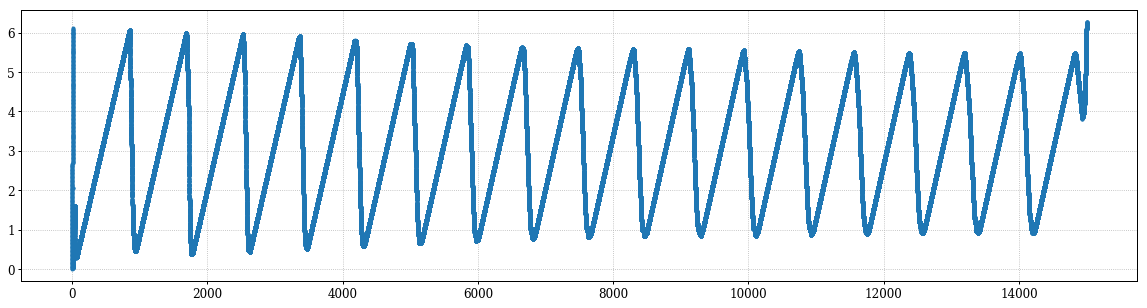

In [31]:
plt.figure(figsize=(20,5))
plt.plot(time_phase,np.mean(phase,axis=0),'.')

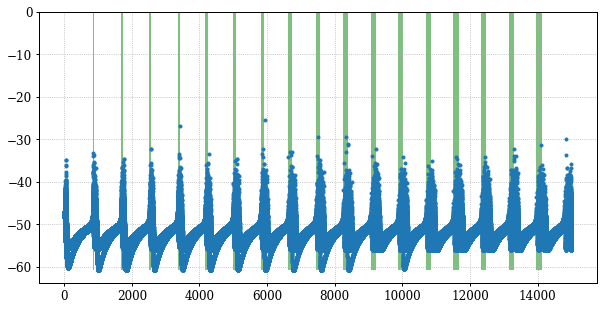

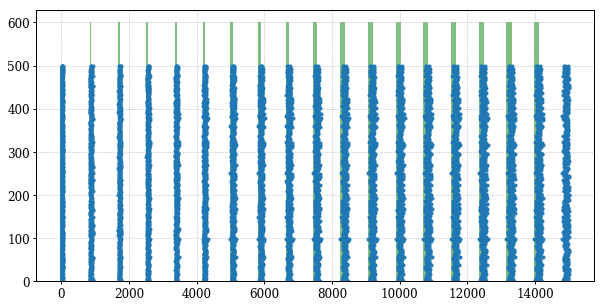

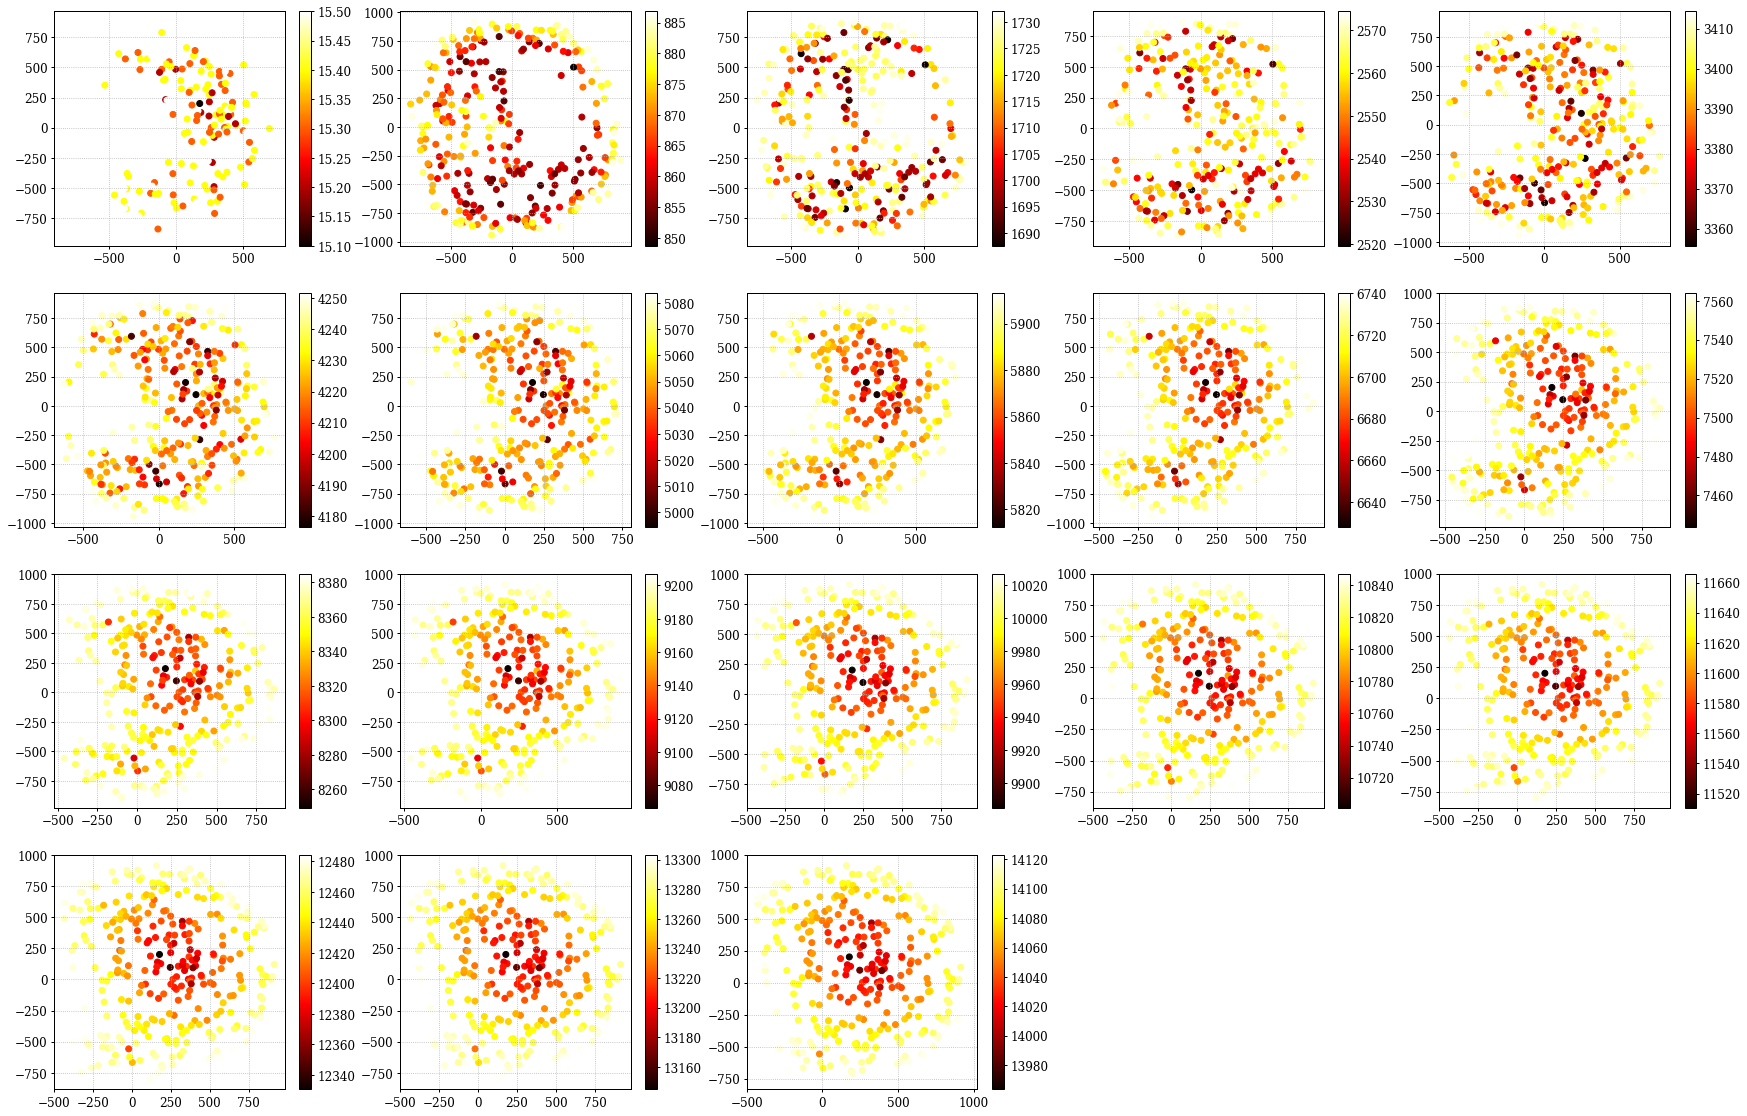

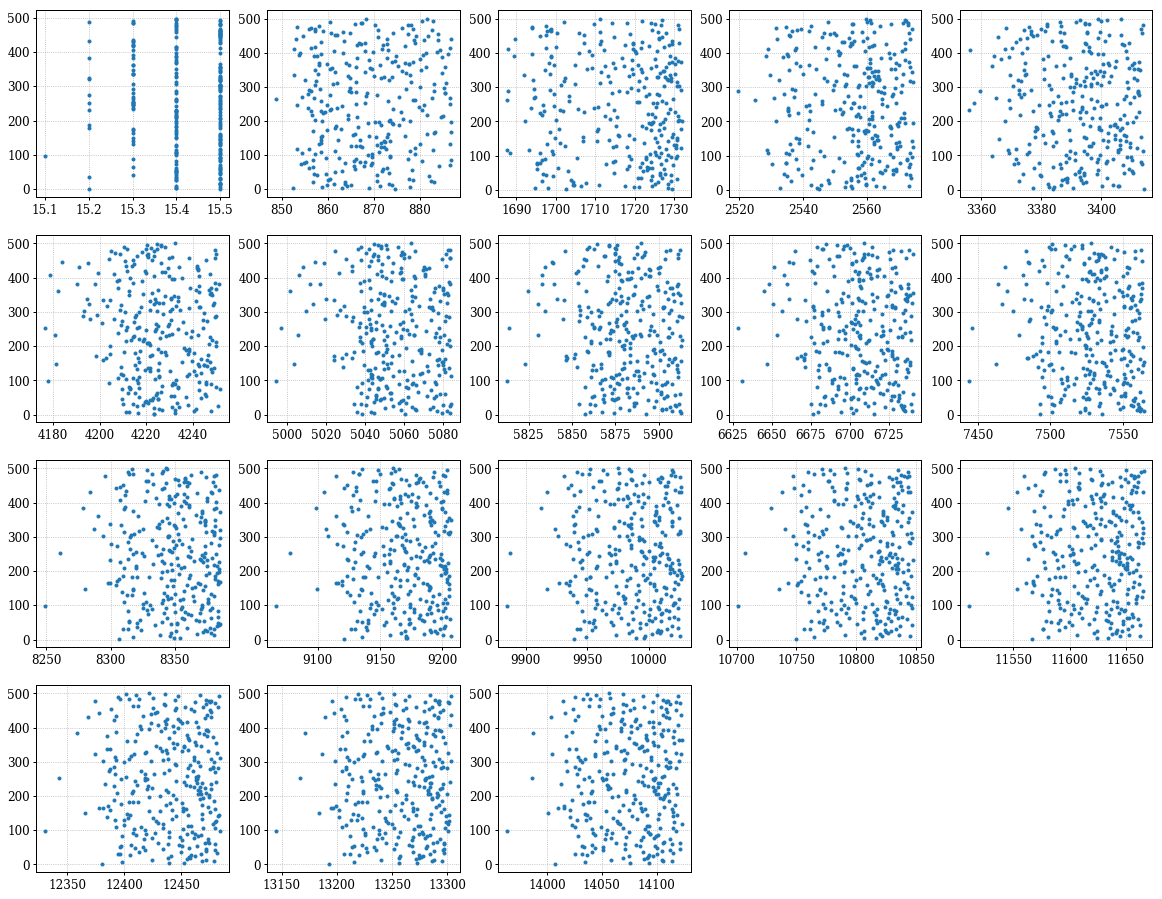

In [32]:
_ = analysis.getBursts_phase(net, time_phase, phase, spikes, senders, vms_time, vms, min_fire = 0.05, threshold = 0.4,\
                             plot_overlay=True, plot_bursts=True, plot_rasters=True, plot_overlay_raster=True)

In [97]:
def getBursts_phase(net, phase_time, phase, spikes, senders, vms_time, vms, min_fire = 1., threshold = 0.8, threshold_low = False, plot_overlay=False, plot_bursts=False, plot_rasters=False, plot_overlay_raster=False):
    
    """
    Function which computes the bursts from the mean phase of the neurons. A burst is where the mean phase is gretater than a threshold
     value
    
    Inputs:
    - net: the nngt network, used for extractions of the positions for plotting
    - spikes:  The spike times of teh neurons from the whole recording
    - senders: The id of the spikes at the corresponding spike times. Should be of the same length as that of spikes
    - vms_time: The time points of the membrane recordings
    - vms: The values of the membrane recordings
    - max_delay : the maximal synaptic delay in the network, we use this to check the length of these burst, one burst can only be separated by 2 times this delay 
    - threshold: the threshold an integer between 0. to 1. which determines how many neurons as a fraction of total neurons are reqd for a burst.    
    - plot_overlay: If to overlay bursts on membrane potential recordings
    - plot_bursts: If to plot the bursts with a spatial time dependent colour coding scheme
    - plot_rasters: To plot the rasters of each of the bursts separately
    - plot_overlay_rasters: To plot the overlay on spike rasters
    
    Outputs:
    - burst_times   = list of spike times at each burst, each element of the list is an array of the spike times.
    - burst_neurons = list of ids of the spiking neurons, each element of the list is an array of the spike ids.
    
    
    
    """
    len_phase     = np.shape(phase)[1]
    burst_times   = []
    burst_neurons = []
    mean_phase    = np.mean(phase,axis=0)    
    N             = net.node_nb()    

    
    if threshold_low:
        idx1   = np.argwhere((np.diff(np.sign(mean_phase - 2*np.pi*threshold)))>0).flatten()
        idx2   = np.argwhere((np.diff(np.sign(mean_phase - 2*np.pi*threshold_low)))<0).flatten()
        slope1 = (np.diff(mean_phase,n=2))[idx1]
        slope2 = (np.diff(mean_phase,n=2))[idx2]
        
        idx1 = idx1[slope1>0]
        idx2 = idx2[slope2<0]
        
        if len(idx1)>1:
            if len(idx2)>0:
                if idx2[0]<idx1[0]:
                    np.delete(idx2,0)
                    np.delete(slope2,0)
                
        if len(idx1)>1:
            if len(idx2)>0:
                if idx2[-1]<idx1[-1]:
                    np.delete(idx1,-1)
                    np.delete(slope1,-1)
        
        #if len(idx1)>len(idx2):
        #    for i in range(len(idx2)):
        #        if phase_time[idx2[i]]<phase_time[idx1[i]]:
        #            idx1 = np.delete(idx1,i)
        #else:
        #    for i in range(len(idx1)):
        #        if phase_time[idx2[i]]<phase_time[idx1[i]]:
        #            idx2 = np.delete(idx2,i)
        
        #print(len(idx1),len(idx2))
        
        plt.figure(figsize=(20,5))
        plt.plot(time_phase,np.mean(phase,axis=0),'.')
        plt.vlines(phase_time[idx1],0,2*np.pi,colors='red')
        plt.vlines(phase_time[idx2],0,2*np.pi,colors='green')
            
        for i in range(0,len(idx1)):
            x = (spikes > phase_time[idx1[i]]) & (spikes < phase_time[idx2[i]])
            if len(np.argwhere(x)) > min_fire*N:
                burst_times.append(spikes[x])
                burst_neurons.append(senders[x])
        
        
    else:
        idx   = np.argwhere(np.diff(np.sign(mean_phase - 2*np.pi*threshold))).flatten()
        slope = (np.diff(mean_phase))[idx]
        
        if slope[0]<0:
            np.delete(idx,0)
            np.delete(slope,-1)

        if slope[-1]>0:
            np.delete(idx,-1)
            np.delete(slope,-1)

        for i in range(0,len(idx)-1,2):
            x = (spikes > phase_time[idx[i]]) & (spikes < phase_time[idx[i+1]])
            if len(np.argwhere(x)) > min_fire*N:
                burst_times.append(spikes[x])
                burst_neurons.append(senders[x])
        
    
    if burst_times:     
        if plot_overlay:
            edge_start = np.zeros(len(burst_times))
            edge_end    = np.zeros(len(burst_times))
            
            for i in range(len(burst_times)):
                edge_start[i] = min(burst_times[i])
                edge_end[i]   = max(burst_times[i])
            plt.figure(figsize=(10,5))
            plt.plot(vms_time,vms,'.')
            plt.bar(edge_start, np.zeros(len(burst_times))+min(vms), align='edge', width=(edge_end-edge_start), alpha=0.5, color='green')
            plt.show()
            
        if plot_overlay_raster:
            edge_start = np.zeros(len(burst_times))
            edge_end    = np.zeros(len(burst_times))
            
            for i in range(len(burst_times)):
                edge_start[i] = min(burst_times[i])
                edge_end[i]   = max(burst_times[i])
            plt.figure(figsize=(10,5))
            plt.plot(spikes,senders,'.')
            plt.bar(edge_start, np.zeros(len(burst_times)) + 1.2*N, align='edge', width=(edge_end-edge_start), alpha=0.5, color='green')
            plt.show()

        if plot_bursts:
            num_subplots = np.ceil(len(burst_times)**0.5)
            plt.figure(figsize=(30,25))

            for i in range(len(burst_times)):
                unique_neurons,unique_indices = np.unique(burst_neurons[i],return_index=True)
                plt.subplot(num_subplots,num_subplots,i+1)
                plt.scatter((net.get_positions(unique_neurons-1))[:,0],(net.get_positions(unique_neurons-1)[:,1]), c = burst_times[i][unique_indices], cmap='hot',marker='o')
                plt.colorbar()
            plt.show()

        if plot_rasters:
            num_subplots = np.ceil(len(burst_times)**0.5)
            plt.figure(figsize=(20,20))
            
            for i in range(len(burst_times)):
                plt.subplot(num_subplots,num_subplots,i+1)
                plt.plot(burst_times[i],burst_neurons[i],'.')
            plt.show()
    else:
        print('No Bursts Found')
        
    return burst_times,burst_neurons   


In [38]:
x = ('gaussian',-50.,30.)
if type(x) is tuple:
    print('tuple-d')

tuple-d


In [45]:
gids = net.to_nest()
nest.SetStatus(gids,'V_m',vms[0:N],_warn=False)
net.set_node_attribute('V_m',vms[0:N], value_type="double")

In [50]:
print(vms[0:N]-net.get_node_attributes(net.nodes(),'V_m'))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [51]:
net.get_node_attributes(net.nodes(),'V_m')

array([ -48.        ,  -92.17451658,  -46.17984244, -102.97220045,
        -57.943459  ,  -77.31842161,  -43.28908263,  -48.        ,
        -48.        ,  -72.52868349,  -57.78703027,  -48.        ,
        -48.        ,  -67.06129928,  -48.        ,  -61.04845056,
        -48.        ,  -93.77600287,  -48.        ,  -48.        ,
        -48.        ,  -63.67198909,  -74.59403112,  -42.33983402,
        -44.87869996,  -90.86383295,  -65.6410056 ,  -78.66543276,
        -45.54291658,  -61.75843419,  -48.        ,  -54.83914963,
        -73.02333519,  -53.75327288,  -72.34407522,  -46.49394231,
        -48.        ,  -55.41371315,  -48.        ,  -46.49709784,
        -48.        ,  -48.        ,  -48.        ,  -48.        ,
       -102.35611753,  -48.        ,  -48.        ,  -48.        ,
        -74.11742245,  -96.5162166 ,  -48.        ,  -89.29079631,
        -77.01659849,  -61.36537303,  -46.41097567,  -94.94632684,
        -48.        ,  -48.        ,  -52.83115529,  -48.     

In [62]:
len(vms[::15000-1])

500

In [63]:
v_t = np.zeros(500)
for i in range(500):
    v_t[i] = vms[::500][-1]

In [70]:
(v_t- vms[::15000])

array([-6.26839697e+00, -3.08876244e+00, -1.24936589e+00, -1.06090133e+00,
       -1.22646943e+00, -1.49038261e+00, -1.74527348e+00, -1.98645546e+00,
       -2.20977028e+00, -2.42606377e+00, -2.62316442e+00, -2.81593768e+00,
       -2.98116658e+00, -3.15602161e+00, -3.30357168e+00, -3.47628675e+00,
       -3.64124347e+00, -3.77124369e+00, -3.93635808e+00, -4.10665509e+00,
       -4.31055172e+00, -4.58433150e+00, -4.96675821e+00, -6.19064542e+00,
       -1.33129583e+00,  1.75486432e+00,  1.79769500e+00,  1.33925555e+00,
        8.48049694e-01,  3.87993189e-01, -3.82895137e-02, -4.47757720e-01,
       -7.94064991e-01, -1.10430445e+00, -1.39253210e+00, -1.65960624e+00,
       -1.90790413e+00, -2.13840500e+00, -2.35364757e+00, -2.55656442e+00,
       -2.75441255e+00, -2.92408530e+00, -3.11661265e+00, -3.27295846e+00,
       -3.42254180e+00, -3.58146301e+00, -3.71606034e+00, -3.87022564e+00,
       -4.04212076e+00, -4.22638878e+00, -4.44444226e+00, -4.75871232e+00,
       -5.37966054e+00, -